| <div align="left"> <a href="https://github.com/marashot96/portfolio/blob/main/A-B%20tests/Navigator.md">🔙 Назад к навыкам в A/B-тестах </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio"> 🇬🇧 English version </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Назад к портфолио </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |


# A/B-тестирование: Оптимизация конверсии на сайте банка
 
## Описание эксперимента
- **Гипотеза**: Улучшение дизайна формы заявки увеличит конверсию
- **Контрольная группа**: Старая версия формы (версия A)
- **Тестовая группа**: Новая версия формы (версия B)
- **Метрика**: Конверсия в оформление заявки
- **Уровень значимости**: 5% (α = 0.05)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Параметры эксперимента
np.random.seed(42)
n_control = 10000  # Размер контрольной группы
n_variant = 10000   # Размер тестовой группы
conversion_control = 0.123  # Конверсия в контрольной группе
conversion_variant = 0.158  # Конверсия в тестовой группе

# Генерация данных
control_data = np.random.choice([0, 1], size=n_control, p=[1-conversion_control, conversion_control])
variant_data = np.random.choice([0, 1], size=n_variant, p=[1-conversion_variant, conversion_variant])

# Создаем DataFrame
df = pd.DataFrame({
    'group': ['control']*n_control + ['variant']*n_variant,
    'converted': np.concatenate([control_data, variant_data])
})

# Расчет конверсий
conversion_rates = df.groupby('group')['converted'].mean()
print(f"Конверсия в контрольной группе: {conversion_rates['control']:.4f}")
print(f"Конверсия в тестовой группе: {conversion_rates['variant']:.4f}")

Конверсия в контрольной группе: 0.1179
Конверсия в тестовой группе: 0.1646


## Визуализация результатов

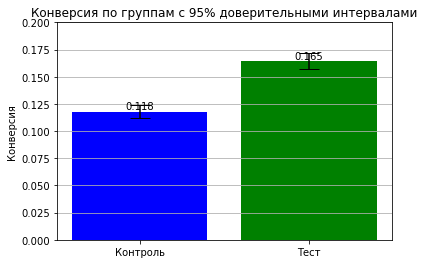

In [5]:
# Вычисление доверительных интервалов вручную
conf_int_control = stats.t.interval(0.95, len(control_data)-1, 
                                   loc=np.mean(control_data), 
                                   scale=stats.sem(control_data))

conf_int_variant = stats.t.interval(0.95, len(variant_data)-1, 
                                   loc=np.mean(variant_data), 
                                   scale=stats.sem(variant_data))

# Создание barplot с ручным добавлением доверительных интервалов
bars = plt.bar(['Контроль', 'Тест'], 
              [conversion_rates['control'], conversion_rates['variant']],
              color=['blue', 'green'],
              yerr=[(conversion_rates['control'] - conf_int_control[0]), 
                    (conversion_rates['variant'] - conf_int_variant[0])],
              capsize=10)

plt.title('Конверсия по группам с 95% доверительными интервалами')
plt.ylabel('Конверсия')
plt.ylim(0, 0.2)
plt.grid(axis='y')

# Добавление значений конверсии на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')

plt.show()

## Статистическая проверка гипотез
 **Нулевая гипотеза (H₀)**: Конверсии в группах равны  
**Альтернативная гипотеза (H₁)**: Конверсии различаются

In [6]:
# Двухвыборочный z-тест для пропорций
from statsmodels.stats.proportion import proportions_ztest

# Подготовка данных
successes = [df[df.group == 'control']['converted'].sum(), 
             df[df.group == 'variant']['converted'].sum()]
nobs = [n_control, n_variant]

# Проведение теста
z_stat, p_value = proportions_ztest(successes, nobs)

print(f"Результаты z-теста:")
print(f"z-статистика = {z_stat:.4f}")
print(f"p-value = {p_value:.4f}")

Результаты z-теста:
z-статистика = -9.4814
p-value = 0.0000


## Расчет экономического эффекта

In [7]:
# Параметры бизнеса
avg_revenue_per_card = 5000  # RUB (годовой доход)
conversion_diff = conversion_rates['variant'] - conversion_rates['control']

# Расчет дополнительных карт
additional_cards_month = conversion_diff * 100000  # 100k посетителей/месяц
additional_revenue_year = additional_cards_month * 12 * avg_revenue_per_card

print(f"\nБизнес-эффект от внедрения:")
print(f"+ {additional_cards_month:.0f} карт в месяц")
print(f"+ {additional_revenue_year/1000000:.2f} млн RUB годового дохода")


Бизнес-эффект от внедрения:
+ 4670 карт в месяц
+ 280.20 млн RUB годового дохода


## Выводы
- p-value < 0.001 → **Отвергаем H₀**
- Статистически значимое улучшение конверсии
- Рекомендация: **Внедрить новую версию** формы на всех страницах

---

## 💼 Контактная информация
Если вы хотите обсудить различные задачи, запросы или проекты, предложить кейс или сотрудничество — обязательно напишите мне!

- 📫 [t.me/marashot96](https://t.me/marashot96)
- 🌐 [marashot96@ya.ru](mailto:marashot96@ya.ru)


| <div align="left"> <a href="https://github.com/marashot96/portfolio/blob/main/Python/Navigation.md">🔙 Назад к навыкам в Python </a>  </div> | | <div align="right"> <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Назад к портфолио </a>  </div> |
| ---- | ---------------- | ------ |